In [4]:
!wget https://raw.githubusercontent.com/xoolive/python/master/data/villes_france.csv

--2021-11-03 09:22:20--  https://raw.githubusercontent.com/xoolive/python/master/data/villes_france.csv
Resolving localhost (localhost)... 127.0.0.1
Connecting to localhost (localhost)|127.0.0.1|:8123... connected.
Proxy request sent, awaiting response... 200 OK
Length: 8031590 (7,7M) [text/plain]
Saving to: ‘villes_france.csv’

villes_france.csv   100%[===================>]   7,66M  2,16MB/s    in 3,7s    

2021-11-03 09:22:24 (2,08 MB/s) - ‘villes_france.csv’ saved [8031590/8031590]



In [21]:
%load_ext lab_black

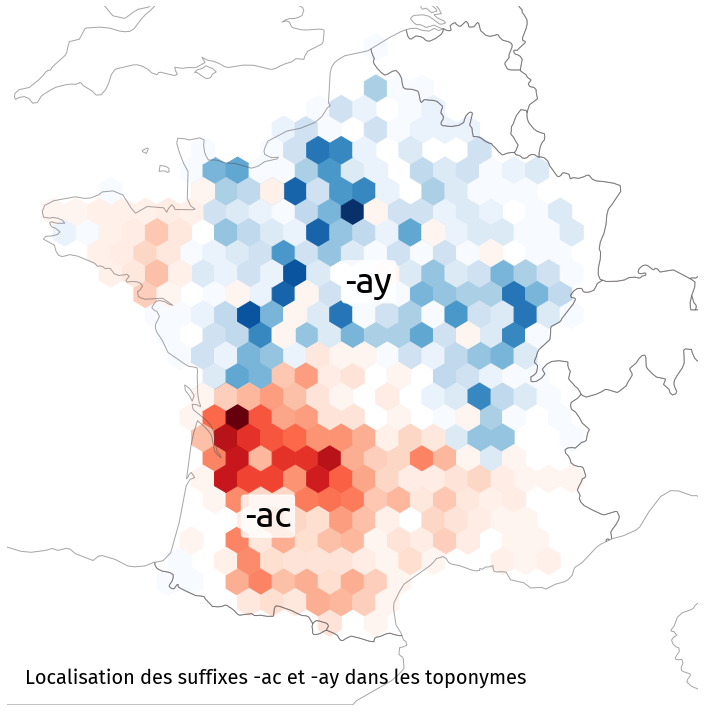

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cartopy import crs, feature
from cartes.crs import Lambert93, EuroPP, PlateCarree
from scipy.stats import gaussian_kde
from matplotlib.offsetbox import AnchoredText

df = pd.read_csv(
    "villes_france.csv",
    usecols=[5, 19, 20],
    names=["nom", "longitude", "latitude"],
)


def countries(**kwargs):
    params = {
        "category": "cultural",
        "name": "admin_0_countries",
        "scale": "10m",
        "edgecolor": "#524c50",
        "facecolor": "none",
        "alpha": 0.5,
        **kwargs,
    }
    return feature.NaturalEarthFeature(**params)


e = Lambert93()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=e))


ville_ac = df.query('nom.str.match(".*\w{2}ac(-|$).*")', engine="python")
ville_ay = df.query('nom.str.match(".*\w{2}ay(-|$).*")', engine="python")


ax.add_feature(countries(scale="50m"))
ax.set_extent((-4.5, 9, 40.5, 51.5))

xmin, xmax, ymin, ymax = ax.get_extent()
cmap = plt.get_cmap("Blues")
cmap.set_under("none")

x, y, *_ = e.transform_points(
    crs.PlateCarree(),
    ville_ay.longitude.values,
    ville_ay.latitude.values,
).T

h = ax.hexbin(x, y, extent=[xmin, xmax, ymin, ymax], gridsize=30, cmap=cmap, vmin=1)

cmap = plt.get_cmap("Reds")
cmap.set_under("none")

x, y, *_ = e.transform_points(
    crs.PlateCarree(),
    ville_ac.longitude.values,
    ville_ac.latitude.values,
).T

h = ax.hexbin(x, y, extent=[xmin, xmax, ymin, ymax], gridsize=30, cmap=cmap, vmin=1)


ax.text(
    x=0,
    y=44,
    transform=PlateCarree(),
    s="-ac",
    fontsize=36,
    fontname="Ubuntu",
    bbox=dict(boxstyle="round", fc="white", ec="white", pad=0.1, alpha=0.8),
)

ax.text(
    x=2,
    y=47.5,
    transform=PlateCarree(),
    s="-ay",
    fontsize=36,
    fontname="Ubuntu",
    bbox=dict(boxstyle="round", fc="white", ec="white", pad=0.1, alpha=0.8),
)


ax.spines["geo"].set_visible(False)


text = AnchoredText(
    "Localisation des suffixes -ac et -ay dans les toponymes",
    loc=3,
    frameon=False,
    prop={"size": 20, "fontname": "Fira Sans"},
)
# text.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(text)

fig.set_tight_layout(True)
fig.savefig("challenge_day4.png", dpi=300, facecolor="white")